In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
F = len('Agnieszka')
L = len('Welian')
N = (L+F) * 100

stan_data = {
    "N":N,
}

## Excercise 1 - generate data

In [3]:
model1 = CmdStanModel(stan_file='code_1.stan')
sample1 = model1.sample(stan_data, iter_sampling=1000, iter_warmup=1,  chains =1)

model2 = CmdStanModel(stan_file='code_2.stan')
sample2 = model2.sample(stan_data, iter_sampling=1000, iter_warmup=1, chains =1)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:10 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


[-0.442467  1.27316   0.329766 ... -1.27474  -0.334264  0.559197]
[-2.73938 -5.28918  5.03734 ... -3.12553  2.24639 -2.88989]


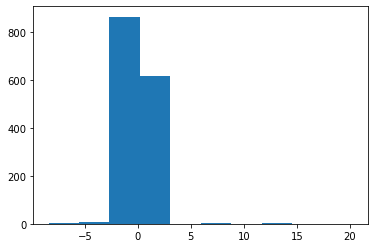

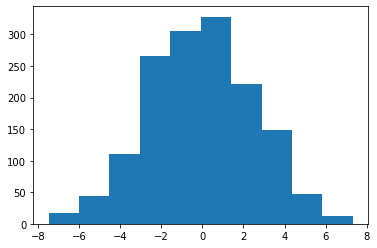

In [4]:
y1 = sample1.stan_variable('y')[0]
print(y1)
y2 = sample2.stan_variable('y')[0]
print(y2)

data1 = {
    'N': N,
    'y': y1
}

data2 = {
    'N': N,
    'y': y2
}

plt.hist(y1)
plt.show()
plt.hist(y2)
plt.show()


## Excercise 2 - compare normal and student models for data from first file

In [5]:
model3 = CmdStanModel(stan_file='code_3.stan')
fit3=model3.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit3_2=model3.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

model4 = CmdStanModel(stan_file='code_4.stan')
fit4=model4.sample(data=data1, iter_sampling=1000, iter_warmup=1, chains =1)

fit4_2=model4.sample(data=data2, iter_sampling=1000, iter_warmup=1, chains =1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:05 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


        rank         waic        p_waic      d_waic    weight          se  \
model4     0 -2407.451069  1.102486e-24    0.000000  0.454266   42.514710   
model3     1 -3267.364781  2.282304e-23  859.913712  0.545734  408.008285   

              dse  warning waic_scale  
model4    0.00000    False        log  
model3  390.14608    False        log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


        rank        waic        p_waic     d_waic    weight         se  \
model3     0 -3805.99858  2.044203e-24    0.00000  0.763142  32.602275   
model4     1 -3933.40581  2.133552e-24  127.40723  0.236858  31.230624   

              dse  warning waic_scale  
model3   0.000000    False        log  
model4  22.777446    False        log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


Text(0.5, 1.0, 'For data from model 2 - WAIC method')

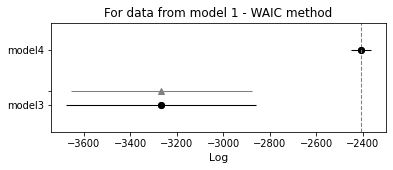

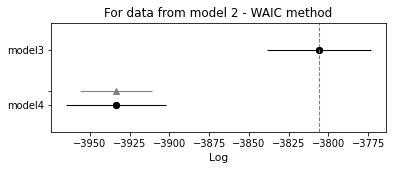

In [6]:
compare_dict_1 = {'model3': fit3,'model4': fit4}
compare_dict_2 = {'model3': fit3_2,'model4': fit4_2}

model_compare_waic_1 = az.compare(compare_dict_1, ic = 'waic')

print(model_compare_waic_1.head())
az.plot_compare(model_compare_waic_1)
plt.title('For data from model 1 - WAIC method')

model_compare_waic_2 = az.compare(compare_dict_2, ic = 'waic')

print(model_compare_waic_2.head())
az.plot_compare(model_compare_waic_2)
plt.title('For data from model 2 - WAIC method')


It looks like the model 4 is a better model in both cases - the middle value is on the same level as value from dataset, so model will be good using a new data. 
With using the current data - model4 will deal with the current data better in case of data from model 2 due to the faact that it's range is pretty wide and covers the dataset values.

c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank          loo  p_loo       d_loo    weight          se        dse  \
model4     0 -2407.451069    0.0    0.000000  0.454266   42.514710    0.00000   
model3     1 -3267.364781    0.0  859.913712  0.545734  408.008285  390.14608   

        warning loo_scale  
model4     True       log  
model3     True       log  


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank         loo  p_loo      d_loo    weight         se        dse  \
model3     0 -3805.99858    0.0    0.00000  0.763142  32.602275   0.000000   
model4     1 -3933.40581    0.0  127.40723  0.236858  31.230624  22.777446   

        warning loo_scale  
model3     True       log  
model4     True       log  


Text(0.5, 1.0, 'For data from model 2 - LOO method')

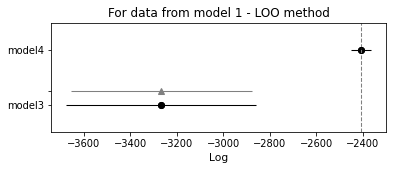

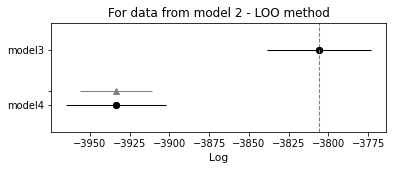

In [7]:
model_compare_loo_1 = az.compare(compare_dict_1, ic="loo", method="stacking", scale="log")

print(model_compare_loo_1.head())
az.plot_compare(model_compare_loo_1)
plt.title('For data from model 1 - LOO method')

model_compare_loo_2 = az.compare(compare_dict_2, ic = 'loo')

print(model_compare_loo_2.head())
az.plot_compare(model_compare_loo_2)
plt.title('For data from model 2 - LOO method')

The LOO and WAIC gives the same results. Conculsions about the models are below the WAIC method.

## Excercise 3 - compare models with different numbers of predictors

In [8]:
x2 = sample2.stan_variable('X')

x2_1 = x2.reshape(1000,-1)[0:1,:N]
x2_1 = np.transpose(x2_1)

x2_2 = x2.reshape(1000,-1)[0:2,:N]
x2_2 = np.transpose(x2_2)

x2_3 = x2.reshape(1000,-1)[0:3,:N]
x2_3 = np.transpose(x2_3)


In [9]:
model5 = CmdStanModel(stan_file='code_5.stan')

fit5_1 = model5.sample(data={'N':N, 'K': 1, 'y':y2,'X':x2_1} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)


fit5_2 = model5.sample(data={'N':N, 'K': 2, 'y':y2,'X':x2_2} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)
                            

fit5_3 = model5.sample(data={'N':N, 'K': 3, 'y':y2,'X':x2_3} ,
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:07 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You 

        rank           loo  p_loo         d_loo    weight          se  \
fit5_3     0  -4001.984590    0.0      0.000000  0.718539   13.212748   
fit5_1     1 -11703.910760    0.0   7701.926170  0.200948  381.879320   
fit5_2     2 -26289.937058    0.0  22287.952468  0.080513  970.993204   

               dse  warning loo_scale  
fit5_3    0.000000     True       log  
fit5_1  375.818862     True       log  
fit5_2  967.949361     True       log  
        rank          waic        p_waic        d_waic    weight          se  \
fit5_3     0  -4001.984590  1.769180e-24      0.000000  0.718539   13.212748   
fit5_1     1 -11703.910760  4.730488e-23   7701.926170  0.200948  381.879320   
fit5_2     2 -26289.937058  2.914069e-22  22287.952468  0.080513  970.993204   

               dse  warning waic_scale  
fit5_3    0.000000    False        log  
fit5_1  375.818862    False        log  
fit5_2  967.949361    False        log  


Text(0.5, 1.0, 'For data from model 5 - waic')

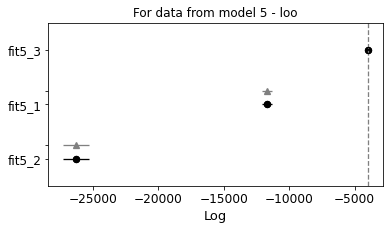

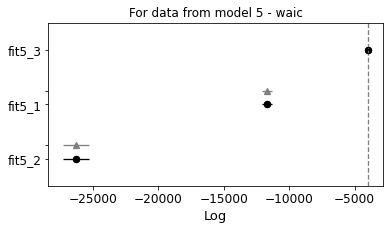

In [11]:
compare_dict_model5 = {'fit5_1': fit5_1, 'fit5_2': fit5_2, 'fit5_3': fit5_3}

model_compare_loo = az.compare(compare_dict_model5, ic="loo")
model_compare_waic = az.compare(compare_dict_model5, ic="waic")

print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('For data from model 5 - loo')

print(model_compare_waic.head())
az.plot_compare(model_compare_waic)
plt.title('For data from model 5 - waic')

Fit5_3 in both cases is the best choice - it means that the number of predictors definitely matter. In this case the bigger number is the better. Fit5_3 model will be good with the new data (comparin the central value) and with the current data (comparing the data range)